In [1]:
##set up
import pandas as pd
import plotly.express as px
import json
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
# # setting style for graphs
style.use('ggplot')
import csv
import datetime
import plotly.io as pio
pio.renderers.default = 'chrome'
import webbrowser    
urL='https://www.google.com'
chrome_path="C:\\Program Files (x86)\\Google\\Chrome\\Application\\chrome.exe"
webbrowser.register('chrome', None,webbrowser.BackgroundBrowser(chrome_path))
# webbrowser.get('chrome').open_new_tab(urL)
print("Set up complete")

Set up complete


In [8]:
## get the Country data of each player and write to file
name = ['defenders', 'forwards', 'goalkeepers', 'midfielders']
for i in range(0,4):
    data = pd.read_csv(f'./data/{name[i]}.csv')
    file = open(f"./data/Country/{name[i]}_country.csv", "w+")
    writer = csv.writer(file)
    for value in data['Country']:
        writer.writerow([value])
    file.close()

In [10]:
#Count number of unique value in 1 column
#  return a dictionary

country_data = pd.read_csv('./data/Country/Countries.csv')

def to_frequency_table(data):
    frequencytable = {}
    for key in data:
        if key in frequencytable:
            frequencytable[key] += 1
        else:
            frequencytable[key] = 1
    return frequencytable


dictionary = to_frequency_table(sorted(country_data['Country']))

In [12]:
#Write result in csv file
destination = './data/Country/Countries.csv'

file = open(f"{destination}", "w")
writer = csv.writer(file)
for key, value in dictionary.items():
    writer.writerow([key, value])
file.close()

In [2]:
country = json.load(open("./data/countries.geojson", "r"))
df = pd.read_csv('./data/Country/Countries.csv')

In [3]:
country_code_map = {}

#map the code in geojson file of each country in csv file
for feature in country['features']:
    feature['code'] = feature['properties']['ISO_A3']
    country_code_map[feature['properties']['ADMIN']] = feature['code']
df['code'] = df['Country'].apply(lambda x: country_code_map[x])

In [4]:
df['Ratio'] = np.log(df['Number']) / np.log(5)

In [5]:
fig = px.choropleth(df, geojson=country,
                    locations='code',
                    featureidkey="properties.ISO_A3",
                    color='Ratio',
                    hover_name='Country',
                    hover_data=['Number'])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [35]:
#get age of players, write to csv file

def from_dob_to_age(born):
        today = datetime.date.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

for i in range(0,4):
    data = pd.read_csv(f'./data/{name[i]}.csv')
    data['Date of Birth'] = pd.to_datetime(data['Date of Birth'])
    
    data['Age'] = data['Date of Birth'].apply(lambda x: from_dob_to_age(x))
    Age = data['Age']
    
    destination_file = f'./data/Age/{name[i]}_age'
    Age.to_csv(f'{destination_file}.csv')

<Figure size 1152x720 with 0 Axes>

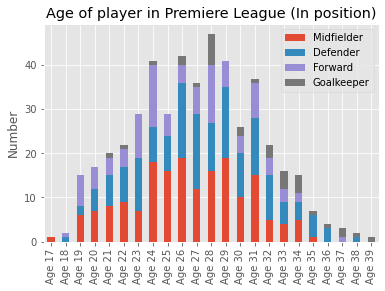

In [6]:
myDf = pd.read_csv('./data/Age/age.csv', index_col = 'Position')

selData = myDf[['Age 17', 'Age 18', 'Age 19', 'Age 20', 'Age 21', 'Age 22', 'Age 23', 'Age 24', 'Age 25', 'Age 26', 'Age 27', 'Age 28', 'Age 29', 'Age 30', 'Age 31', 'Age 32', 'Age 33', 'Age 34', 'Age 35', 'Age 36', 'Age 37', 'Age 38', 'Age 39']]
selData = selData.transpose()

plt.figure(figsize=(16,10))
selData.plot(kind='bar', stacked = True)
plt.title('Age of player in Premiere League (In position)')
plt.ylabel('Number')
plt.legend()
# plt.savefig('Age of players.png')
plt.show()